In [343]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
#import pickle
#import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
#from time import ctime
from datetime import datetime
import csv
import re

%matplotlib inline

In [4]:
datapath = "../data/"
outputs = "../outputs/"

# links
* https://darksky.net/dev/docs
* https://github.com/bitpixdigital/forecastiopy3

In [142]:
time= "1561950000" # = 2019-7-1-0-0-0
units = "si"
lang = "en"
daily = 60*60*24 # = number of seconds in a day
days_in_month = 31
days_in_month = days_in_month-1

In [213]:
save_csv("montevideo")
save_csv("miraflores")

# csv to pandas

In [31]:
df_montevideo = pd.read_csv(os.path.join(datapath,'19-07-{}-weather.csv'.format("montevideo")))
df_miraflores = pd.read_csv(os.path.join(datapath,'19-07-{}-weather.csv'.format("miraflores")))

In [28]:
dfs_dict = {}
dfs_dict = {"montevideo": df_montevideo, "miraflores": df_miraflores}

In [32]:
df_miraflores.head()

,time,apparentTemperature,cloudCover,humidity,precipIntensity,precipProbability,temperature
0,1561939200,23.11,0.69,0.76,0.0202,0.07,22.79
1,1561942800,22.84,1.00,0.77,0.0091,0.06,22.52
2,1561946400,22.80,1.00,0.76,0.0253,0.07,22.51
3,1561950000,22.80,1.00,0.75,0.0532,0.07,22.54
4,1561953600,22.88,0.93,0.74,0.0652,0.07,22.62


In [33]:
df_miraflores.tail()

,time,apparentTemperature,cloudCover,humidity,precipIntensity,precipProbability,temperature
19,1562007600,23.89,0.50,0.74,0.0056,0.02,23.55
20,1562011200,23.85,0.66,0.73,0.0107,0.03,23.54
21,1562014800,23.72,0.77,0.73,0.0217,0.04,23.42
22,1562018400,23.51,0.80,0.74,0.0239,0.05,23.21
23,1562022000,23.26,0.78,0.75,0.0257,0.05,22.95


In [34]:
df_montevideo.head()

,time,apparentTemperature,cloudCover,humidity,precipIntensity,precipProbability,temperature
0,1561946400,18.80,0.88,0.97,1.6447,0.57,18.37
1,1561950000,18.80,0.83,0.96,1.8710,0.56,18.40
2,1561953600,18.79,0.81,0.94,1.1489,0.56,18.43
3,1561957200,18.73,0.81,0.93,0.4373,0.48,18.40
4,1561960800,18.23,0.77,0.91,0.1413,0.18,18.01


In [70]:
df_montevideo.tail()

,time,apparentTemperature,cloudCover,humidity,precipIntensity,precipProbability,temperature
19,1562014800,16.02,1.00,0.78,0.3203,0.44,16.02
20,1562018400,16.43,0.99,0.76,0.3282,0.42,16.43
21,1562022000,16.64,0.98,0.75,0.3575,0.39,16.64
22,1562025600,16.26,0.91,0.76,0.3219,0.36,16.26
23,1562029200,16.08,0.66,0.74,0.0260,0.08,16.08


In [71]:
print("INFO:\n")
for name,df in dfs_dict.items():
    print(name.upper(), '\n')
    print(df.info(), '\n')

INFO:

MONTEVIDEO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
time                   24 non-null int64
apparentTemperature    24 non-null float64
cloudCover             24 non-null float64
humidity               24 non-null float64
precipIntensity        24 non-null float64
precipProbability      24 non-null float64
temperature            24 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.4 KB
None 

MIRAFLORES 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
time                   24 non-null int64
apparentTemperature    24 non-null float64
cloudCover             24 non-null float64
humidity               24 non-null float64
precipIntensity        24 non-null float64
precipProbability      24 non-null float64
temperature            24 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.4 KB
None 



In [64]:
print("DESCRIPTION:\n")
for name,df in dfs_dict.items():
    print(name.upper(), '\n')
    print(df.describe(), '\n')

DESCRIPTION:

MONTEVIDEO 

               time  apparentTemperature  cloudCover   humidity  \
count  2.400000e+01            24.000000   24.000000  24.000000   
mean   1.561988e+09            17.104583    0.777917   0.814583   
std    2.545584e+04             1.066824    0.235593   0.078296   
min    1.561946e+09            15.190000    0.320000   0.740000   
25%    1.561967e+09            16.387500    0.627500   0.750000   
50%    1.561988e+09            17.265000    0.820000   0.785000   
75%    1.562008e+09            17.470000    1.000000   0.882500   
max    1.562029e+09            18.800000    1.000000   0.970000   

       precipIntensity  precipProbability  temperature  
count        24.000000          24.000000    24.000000  
mean          0.339025           0.237917    17.022917  
std           0.510044           0.204301     0.952354  
min           0.000000           0.000000    15.190000  
25%           0.011475           0.067500    16.387500  
50%           0.119900     

In [66]:
print("VARIABLE CATEGORIES:\n")
for name,df in dfs_dict.items():
    print(name.upper(), '\n')
    for cat in df.columns:
        print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, df_miraflores[cat].unique().size))

VARIABLE CATEGORIES:

MONTEVIDEO 

Number of levels in category 'time':  24.00 
Number of levels in category 'apparentTemperature':  23.00 
Number of levels in category 'cloudCover':  20.00 
Number of levels in category 'humidity':  9.00 
Number of levels in category 'precipIntensity':  20.00 
Number of levels in category 'precipProbability':  7.00 
Number of levels in category 'temperature':  23.00 
MIRAFLORES 

Number of levels in category 'time':  24.00 
Number of levels in category 'apparentTemperature':  23.00 
Number of levels in category 'cloudCover':  20.00 
Number of levels in category 'humidity':  9.00 
Number of levels in category 'precipIntensity':  20.00 
Number of levels in category 'precipProbability':  7.00 
Number of levels in category 'temperature':  23.00 


# visualization
Wind Speed and Precipitation Intensity

In [479]:
hour_of_day = 12+1

prec_dict = {}
wind_dict = {}
time_list = []
for loc in ["miraflores", "montevideo", "rio_de_janeiro"]:
    file_name = os.path.join(datapath,'{}-daily_weather.csv'.format(loc))
    csv_reader = csv.reader(open(file_name, mode='r'))
    
    prec_list = []
    wind_list = []
    #count = -1
    day_count = 0
    for row in csv_reader:
        #count +=1
        if day_count == 0: 
            day_count += 1
            continue
        #if (count-hour_of_day) % 24 != 0: continue
        prec_list.append(float(row[3]))
        wind_list.append(float(row[4]))
        
        if loc == "miraflores":
            date = day_count #int(row[0][8:10])
            #date = row[0][:10]
            date = datetime.strptime(row[0][:10], "%Y-%m-%d")
            time_list.append(date)
        day_count += 1
        #if day_count == 40: break
            
    prec_dict[loc] = prec_list
    wind_dict[loc] = wind_list
prec_dict['datetime'] = time_list

In [480]:
prec_dict['datetime']

[datetime.datetime(2018, 9, 30, 0, 0),
 datetime.datetime(2018, 10, 1, 0, 0),
 datetime.datetime(2018, 10, 2, 0, 0),
 datetime.datetime(2018, 10, 3, 0, 0),
 datetime.datetime(2018, 10, 4, 0, 0),
 datetime.datetime(2018, 10, 5, 0, 0),
 datetime.datetime(2018, 10, 6, 0, 0),
 datetime.datetime(2018, 10, 7, 0, 0),
 datetime.datetime(2018, 10, 8, 0, 0),
 datetime.datetime(2018, 10, 9, 0, 0),
 datetime.datetime(2018, 10, 10, 0, 0),
 datetime.datetime(2018, 10, 11, 0, 0),
 datetime.datetime(2018, 10, 12, 0, 0),
 datetime.datetime(2018, 10, 13, 0, 0),
 datetime.datetime(2018, 10, 14, 0, 0),
 datetime.datetime(2018, 10, 15, 0, 0),
 datetime.datetime(2018, 10, 16, 0, 0),
 datetime.datetime(2018, 10, 17, 0, 0),
 datetime.datetime(2018, 10, 18, 0, 0),
 datetime.datetime(2018, 10, 19, 0, 0),
 datetime.datetime(2018, 10, 20, 0, 0),
 datetime.datetime(2018, 10, 21, 0, 0),
 datetime.datetime(2018, 10, 22, 0, 0),
 datetime.datetime(2018, 10, 23, 0, 0),
 datetime.datetime(2018, 10, 24, 0, 0),
 datetime.

In [481]:
[X_labels[i] for i in range(len(X)) if i % 50 == 0]

[736967.0, 737017.0, 737067.0, 737117.0, 737167.0, 737217.0, 737267.0]

In [482]:
datetime.strptime('2018-09-30', "%Y-%m-%d")

datetime.datetime(2018, 9, 30, 0, 0)

In [483]:
X_labels = matplotlib.dates.date2num(prec_dict['datetime'])

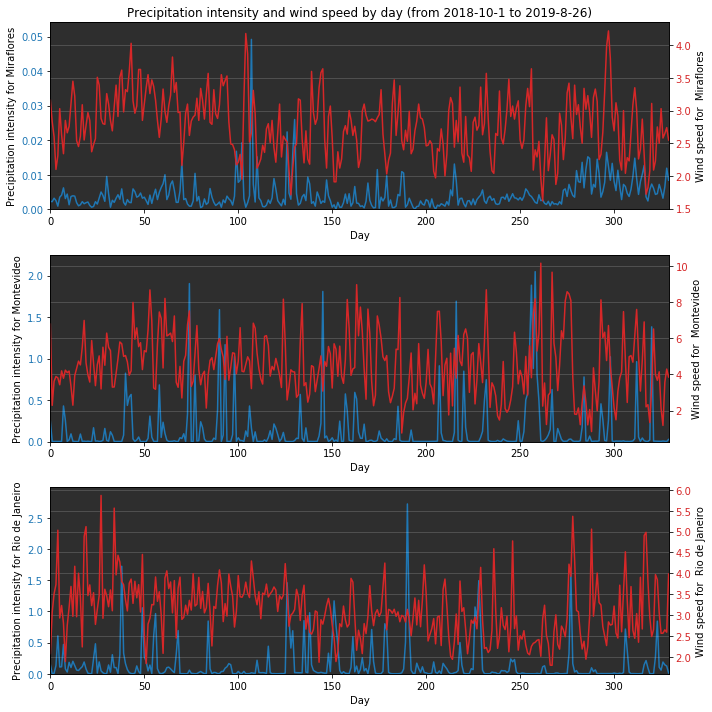

In [488]:
X = range(len(X_labels))

legend = ['Miraflores', 'Montevideo', 'Rio_de_Janeiro']


axes2 = []
fig, (ax1a, ax1b, ax1c) = plt.subplots(3,figsize=(10,10))
axes1 = [ax1a, ax1b, ax1c]

count = 0
for city in legend:
    y = prec_dict[city.lower()] #city.lower()
    city_clean = re.sub('_', ' ', city)
    color = 'tab:blue'
    title = 'Precipitation intensity and wind speed by day (from 2018-10-1 to 2019-8-26)'
    axes1[0].set_title(title)
    axes1[count].set_xlabel('Day')
    axes1[count].set_ylabel('Precipitation intensity for {}'.format(city_clean))
    axes1[count].tick_params(axis='y', labelcolor=color)
    
    axes1[count].set_xticks([i for i in X if i % 50 == 0])
    axes1[count].set_ylim([0, max(y)*1.1])
    axes1[count].set_xlim([0, max(X)])
    axes1[count].set_facecolor("#2E2E2E")
    axes1[count].plot(X, y, color)
    
    y = wind_dict[city.lower()]
    color = 'tab:red'
    ax_right = axes1[count].twinx()
    axes2.append(ax_right)
    axes2[count].set_ylabel('Wind speed for  {}'.format(city_clean))
    axes2[count].plot(X, y, color)
    axes2[count].tick_params(axis='y', labelcolor=color)
    
    plt.grid(True, color="white", alpha=0.2)
    
    fig.tight_layout()
    count += 1
file = os.path.join(outputs,'weather.png')
plt.savefig(file)
#plt.clf()

no dia em torno de 250 todos tem um mesmo dia de muita chuva. investigar.

# Altair
https://altair-viz.github.io/user_guide/compound_charts.html

https://github.com/altair-viz/altair/issues/873

different  scales
https://github.com/altair-viz/altair/issues/1138

demos
https://altair-viz.github.io/user_guide/interactions.html

In [311]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

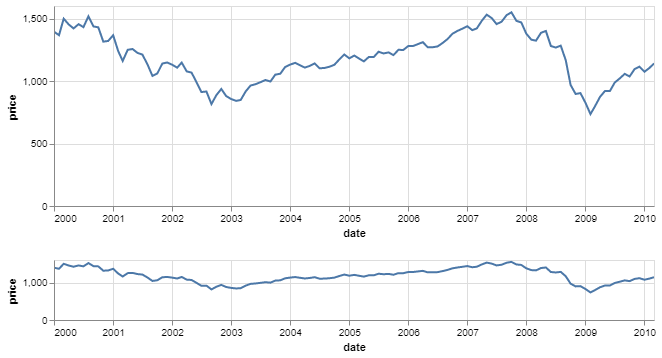

In [314]:

sp500 = data.sp500.url

brush = alt.selection(type='single', encodings=['x'])

upper = alt.Chart(sp500).mark_line().encode(
    x=alt.X('date:T', scale=alt.Scale(domain=brush)),
    y='price:Q'
).properties(
    width=600,
    height=200
)

lower = upper.properties(
    height=60
).add_selection(brush)

alt.vconcat(upper, lower)

In [498]:
data.cars

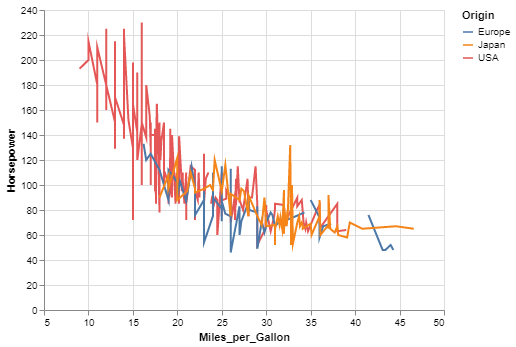

In [491]:
import altair as alt
from vega_datasets import data

cars = data.cars.url

alt.Chart(cars).mark_line().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N'
)

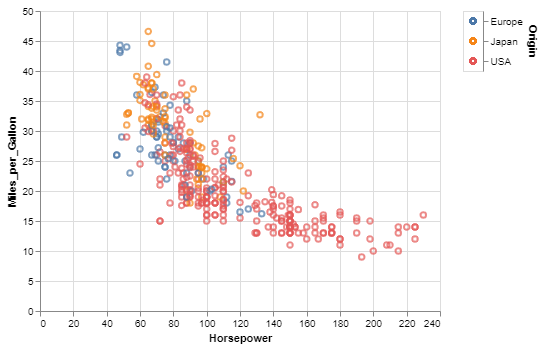

In [496]:
selection = alt.selection_multi(fields=['Origin'])
color = alt.condition(selection,
                      alt.Color('Origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(cars).mark_point().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

scatter | legend

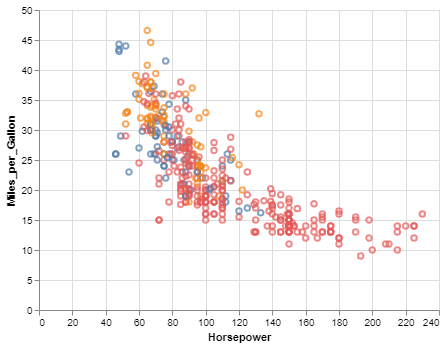

In [497]:
input_dropdown = alt.binding_select(options=['Europe','Japan','USA'])
selection = alt.selection_single(fields=['Origin'], bind=input_dropdown, name='Country of ')
color = alt.condition(selection,
                    alt.Color('Origin:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
).add_selection(
    selection
)

### worst day

In [485]:
hour_of_day = 12+1

file_name = os.path.join(datapath,'{}-daily_weather.csv'.format("rio_de_janeiro"))
csv_reader = csv.reader(open(file_name, mode='r'))

prec_list = []
count = -1
day_count = 0
for row in csv_reader:
    count +=1
    if count == 0: continue

    prec_list.append(float(row[3]))
    
    date = day_count #int(row[0][8:10])
    #time_list.append(date)
    day_count += 1
        
max(prec_list)
#prec_dict[loc] = prec_list
#prec_dict['datetime'] = time_list

2.7219333333333338

In [486]:
QUANTILE = 0.7
nth_big = int((1-QUANTILE)*len(a))
nth_big

3

In [487]:
QUANTILE = 0.8
nth_big = int((1-QUANTILE)*len(a))
nth_big = np.partition(np.array(prec_list), -nth_big)[-nth_big]
print(nth_big)
prec_dict['datetime'][prec_list.index(nth_big)]

2.7219333333333338


datetime.datetime(2019, 4, 8, 0, 0)

In [477]:
prec_list.index(nth_big)

256

In [475]:
print(nth_big)
prec_dict['datetime'][prec_list.index(nth_big)]

2.6019666666666663


datetime.datetime(2019, 6, 13, 0, 0)

In [417]:
np.partition(a, -nth_big)[-nth_big]

10

In [418]:
a = np.array([1,2,3,4,5,6,7,8,9,10])

#np.quantile(np.array(prec_list), .9) 
np.partition(np.array(prec_list), -nth_big)[-nth_big]

2.6019666666666663

### get hourly data from worst day

In [ ]:
prec_dict = {}
wind_dict = {}
time_list = []

loc = "miraflores"
file_name = os.path.join(datapath,'{}-weather.csv'.format(loc))
csv_reader = csv.reader(open(file_name, mode='r'))

prec_list = []
wind_list = []
#count = -1
day_count = 0
for row in csv_reader:
    #count +=1
    if day_count == 257: print('done')
    if day_count == 0: 
        day_count += 1
        continue
    prec_list.append(float(row[3]))
    wind_list.append(float(row[4]))
    
    if loc == "miraflores":
        date = day_count #int(row[0][8:10])
        time_list.append(date)
    day_count += 1/24
        
prec_dict[loc] = prec_list
wind_dict[loc] = wind_list

prec_dict['datetime'] = time_list

# tests